<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia (2141720155)**

---



# **Practicum**

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the brightness level of the image
----------------------------------------
Enter brightness value : 30


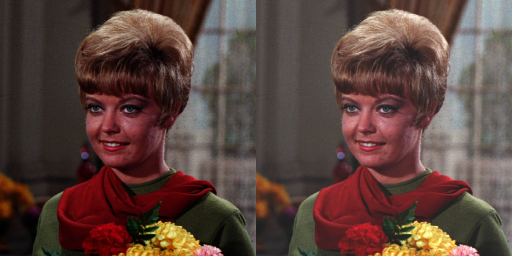

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Change the brightness level of the image')
print('----------------------------------------')

try:
  brightness = int(input('Enter brightness value : '))
except ValueError:
  print('Error, not a number')

ori = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_img = np.zeros(ori.shape, ori.dtype)

#access per pixels
for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):
      brightness_img[y,x,c] = np.clip(ori[y,x,c] + brightness, 0,255)

# simple way without loop
# brightness_img = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((ori, brightness_img))
cv2_imshow(final_frame)

# **Task**

### **1. Implement image inverse in your code using formula shown in the theoretical background subsection**

Create a negative image (Mandrill)


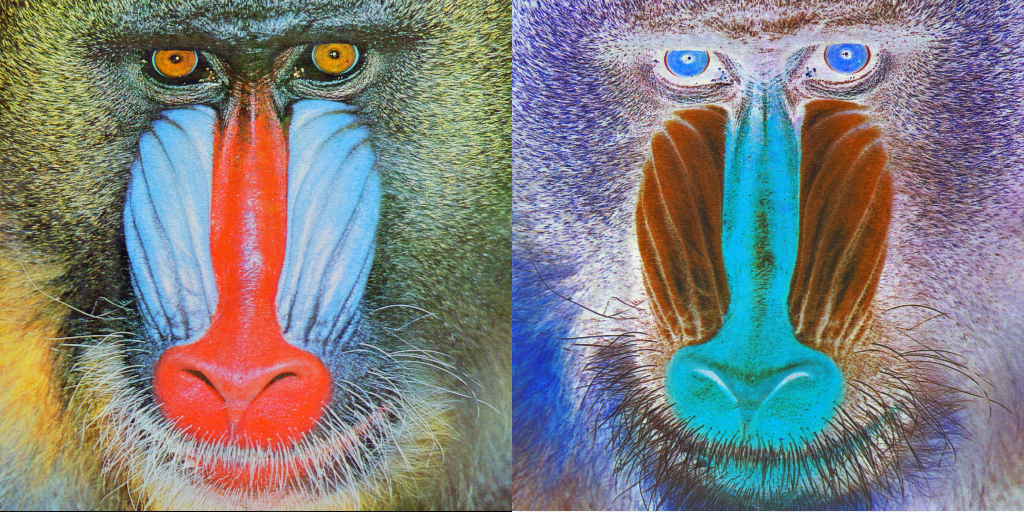

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Create a negative image (Mandrill)')

mandrill = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
inverse_img = np.zeros(ori.shape, ori.dtype)

# Image Inversion
for y in range(mandrill.shape[0]):
    for x in range(mandrill.shape[1]):
        for c in range(mandrill.shape[2]):
          #inverse = 255 - original
          inverse_img[y, x, c] = 255 - mandrill[y, x, c]

final_frame = cv.hconcat((mandrill, inverse_img))
cv2_imshow(final_frame)

### **2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section**

Change the contrast and brightness level of the image
-----------------------------------------------------
Enter brightness level [(-255) - 255] : 60
Enter contrast [1.0 - 3.0]: 1.5


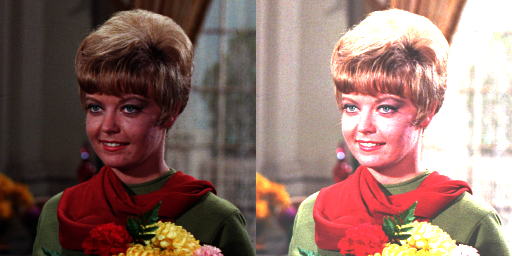

In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Change the contrast and brightness level of the image')
print('-----------------------------------------------------')

try:
  brightness = int(input('Enter brightness level [(-255) - 255] : '))
  contrast = float(input('Enter contrast [1.0 - 3.0]: '))
except ValueError:
  print('Error, invalid input')

female = cv.imread('/content/drive/MyDrive/Images/female.tiff')

# Apply contrast and brightness transformation without looping
con_factor = (contrast + 1.0) / 1.0 # calculate constanta
conbright_img = cv.convertScaleAbs(female, alpha=con_factor, beta=brightness)

final_frame = cv.hconcat((female, conbright_img))
cv2_imshow(final_frame)


### **3. Implement transformation of logarithmic brightness on Google Colaboratory using the formula written in the Theoretical Background Reviews**

Changing the image brightness level with logarithmic transformation
-------------------------------------------------------------------
Enter a brightness value: 40


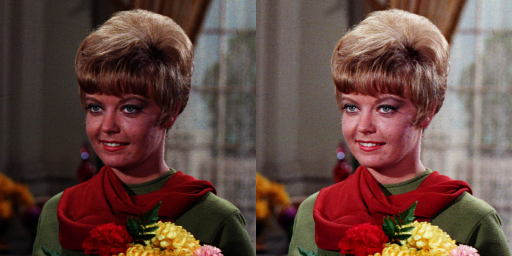

In [14]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Changing the image brightness level with logarithmic transformation')
print('-------------------------------------------------------------------')

try:
    brightness = int(input('Enter a brightness value: '))
except ValueError:
    print('Error, not a number')

feml = cv.imread('/content/drive/MyDrive/Images/female.tiff')

ori_float = feml.astype(np.float32) # convert image
bright_img = np.log1p(ori_float + brightness) # apply logarithmic transformation

# return to normalization
brightness_image = (bright_img - np.min(bright_img)) / (np.max(bright_img) - np.min(bright_img)) * 255
brightness_image = brightness_image.astype(np.uint8)

final_frame = cv.hconcat((feml, brightness_image))
cv2_imshow(final_frame)

### **4. Implement grayscale transformation using the averaging, lightness, and luminance method on Google Colaboratory using the formula written in the Theoretical Background Reviews**



#### **a. Averaging**

Grayscale transformation using averaging


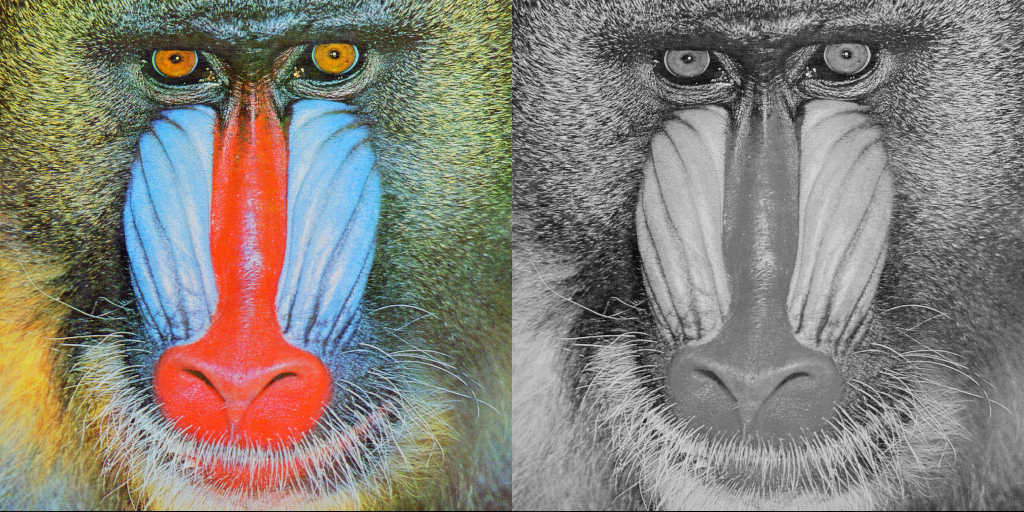

In [30]:
import cv2 as cv
from google.colab.patches import cv2_imshow

print('Grayscale transformation using averaging')

ave_mandrill = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')

# Convert color image
gray_image = cv.cvtColor(ave_mandrill, cv.COLOR_BGR2GRAY)

final_frame = cv.hconcat((ave_mandrill, cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)))
cv2_imshow(final_frame)

#### **b. Lightness**

Grayscale transformation using lightness method


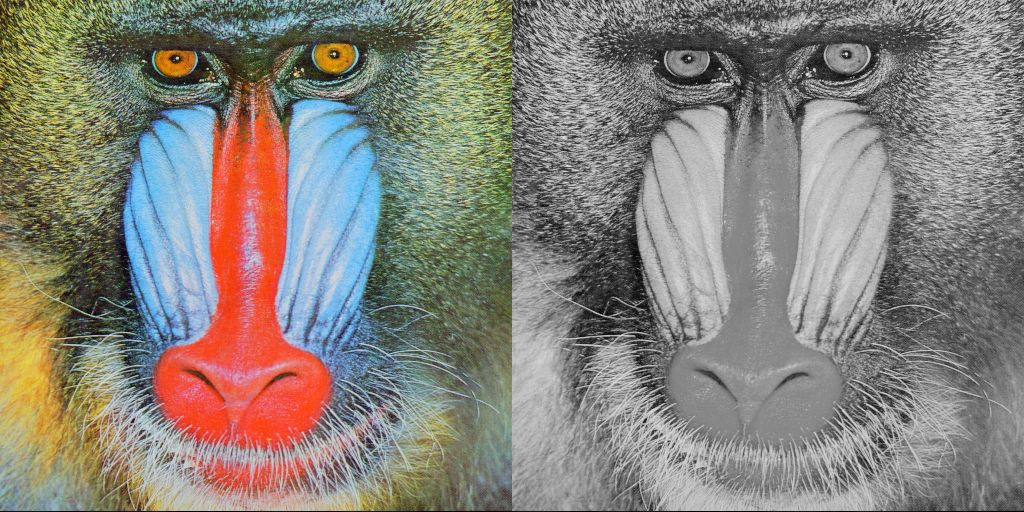

In [31]:
import cv2
from google.colab.patches import cv2_imshow

print('Grayscale transformation using lightness method')

light_mandrill = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')

# Convert to the lab color space
lab_img = cv2.cvtColor(light_mandrill, cv2.COLOR_BGR2Lab)

# Set the channels to a neutral value
lab_img[:, :, 1] = 128
lab_img[:, :, 2] = 128

# Return to BGR color space
grayscale_img= cv2.cvtColor(lab_img, cv2.COLOR_Lab2BGR)

final_frame = cv2.hconcat((light_mandrill, grayscale_img))
cv2_imshow(final_frame)

#### **c. Luminance**

Grayscale transformation using luminance method


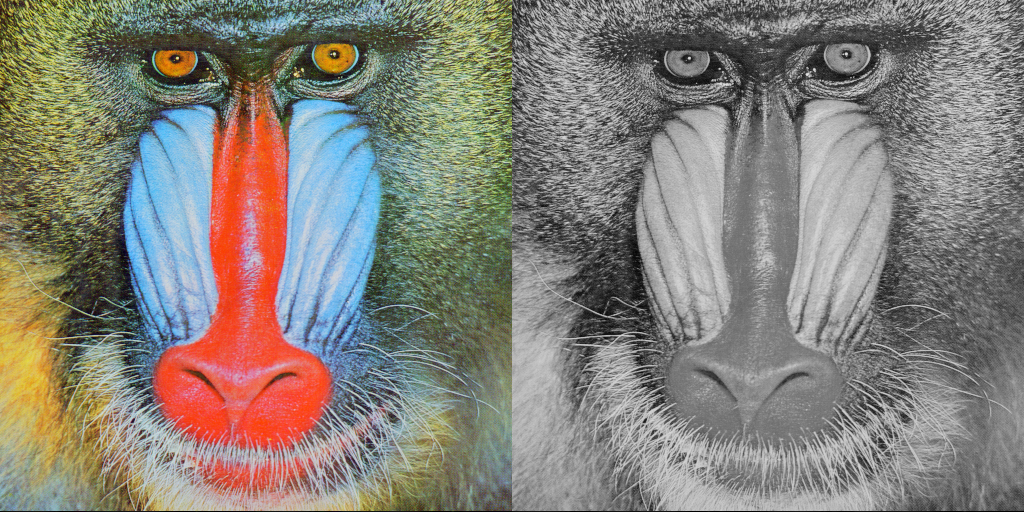

In [32]:
import cv2
from google.colab.patches import cv2_imshow

print('Grayscale transformation using luminance method')

lumin_mandrill = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff')

# Convert to YUV color
yuv_img = cv2.cvtColor(lumin_mandrill , cv2.COLOR_BGR2YUV)

# Keep luminance and set chroma to a constant value
luminance_img = yuv_img[:, :, 0]
yuv_img[:, :, 1] = 128
yuv_img[:, :, 2] = 128

# Return to BGR color space
grayscale_image = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

final_frame = cv2.hconcat((lumin_mandrill , grayscale_image))
cv2_imshow(final_frame)

### **5. Show certain colors in the image , and change other colors to grayscale. For example , show the blue color in the image input and change the parts other which is not colored blue into grayscale**